# Video Sharing Analysis


## Goal


The company of this challenge allows users to upload videos online, just like YouTube.

This company is interested in knowing whether a video is “hot” (i.e. trending up in terms of popularity), stable or going down. Understanding this would allow to optimize the videos promoted on the home-page and, therefore, maximize ads revenue.


## Challenge Description


Company XYZ is an online video streaming company, just like YouTube or Dailymotion.

The Head of Product has identified as a major problem for the site a very high home page drop-off rate. That is, users come to the home-page and then leave the site without taking any action or watching any video.
Since customer acquisition costs are very high, this is a huge problem: the company is spending a lot of money to acquire users who don’t generate any revenue by clicking on ads.

Currently, the videos shown on the home page to new users are manually chosen. The Head of Product had this idea of creating a new recommended video section on the home page.

She asked you the following:

- Classify each video into one these 3 categories:

   ”Hot” - means trending up. These videos are candidates to be shown.
   “Stable and Popular” - video view counts are flat, but very high. These videos are candidates to be shown too.
   “Everything else” - these videos won’t be shown.


- What are the main characteristics of the “hot videos”?


- After having identified the characteristics of the hot videos, how would you use this information from a product standpoint?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

18_Video_Sharing_Analysis.ipynb  video_features.csv
video_count.csv


In [3]:
df_count = pd.read_csv('video_count.csv')
print(df_count.shape)
df_count.head(10)

(41775, 3)


,video_id,count,date
0,2303,22,2015-01-07
1,1193,54854,2015-01-12
2,1219,1788779,2015-01-03
3,1472,234,2015-01-04
4,2947,14407,2015-01-08
5,1417,973996,2015-01-14
6,1564,42,2015-01-09
7,2962,278000,2015-01-03
8,2057,1134427,2015-01-05
9,1785,1059824,2015-01-09


- video_id : unique by video and joinable to the video id in the other table
- count : total count of views for each video
- date : on which day that video was watched that many times

In [4]:
df_feature = pd.read_csv('video_features.csv')
print(df_feature.shape)
df_feature.head()

(2785, 5)


,video_id,video_length,video_language,video_upload_date,video_quality
0,2374,1760,Cn,2014-12-06,480p
1,1897,489,Cn,2014-12-10,720p
2,2386,1273,Es,2014-12-05,480p
3,2912,986,Es,2014-12-10,240p
4,2432,1050,Other,2014-12-10,480p


## Question I

Classify each video into one these 3 categories: Hot, Stable and Popular, and Everything else.

In [5]:
df_count.isnull().sum()

video_id    0
count       0
date        0
dtype: int64

In [6]:
df_count.dtypes

video_id     int64
count        int64
date        object
dtype: object

In [7]:
df_count['count'].describe()

count    4.177500e+04
mean     6.243710e+05
std      8.879097e+05
min      1.000000e+00
25%      9.095500e+03
50%      1.795580e+05
75%      9.043615e+05
max      6.070570e+06
Name: count, dtype: float64

In [8]:
df_popular = df_count.groupby('video_id').agg({'count': sum}).reset_index()
df_popular = df_popular.rename(columns={'count':'counts'})
df_popular.head(10)

,video_id,counts
0,1,1059534
1,2,26057119
2,3,34391719
3,4,41105881
4,5,6719960
5,6,1097226
6,7,3792578
7,8,30740405
8,9,4901
9,10,133547


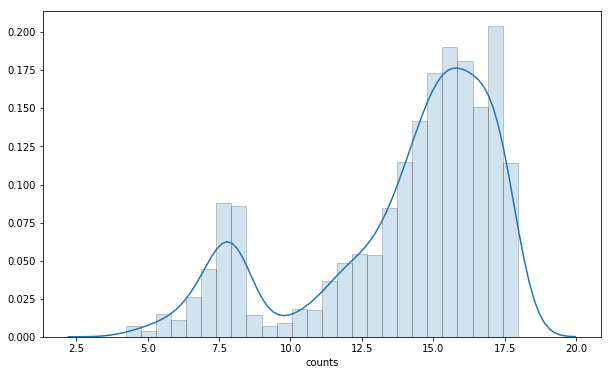

In [9]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(np.log(df_popular.counts), hist_kws=hist_kws, ax=ax)
plt.show()

In [10]:
df_popular2 = df_count.groupby('video_id').agg({'count':np.mean}).rename(columns={'count':'means'}).reset_index()
df_popular = pd.merge(df_popular, df_popular2, how = 'left', on = 'video_id')
df_popular.head(10)

,video_id,counts,means
0,1,1059534,7.063560e+04
1,2,26057119,1.737141e+06
2,3,34391719,2.292781e+06
3,4,41105881,2.740392e+06
4,5,6719960,4.479973e+05
5,6,1097226,7.314840e+04
6,7,3792578,2.528385e+05
7,8,30740405,2.049360e+06
8,9,4901,3.267333e+02
9,10,133547,8.903133e+03


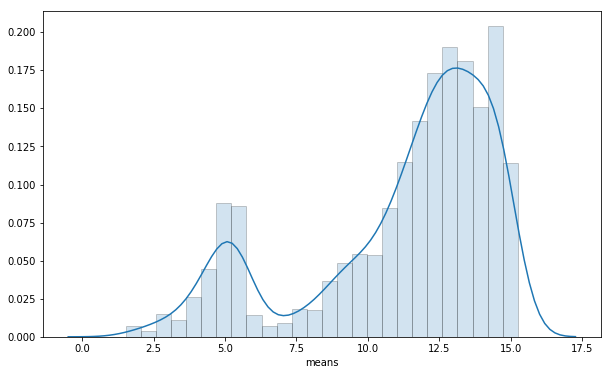

In [11]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(np.log(df_popular.means), hist_kws=hist_kws, ax=ax)
plt.show()

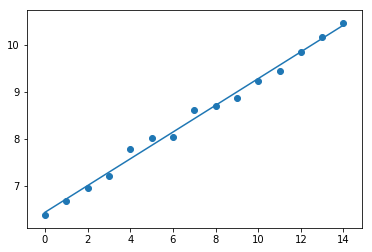

0.28376598400658143


In [12]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

df_temp = df_count[df_count.video_id == 10].sort_values('date')

X = []
Y = []
for i in range(df_temp.shape[0]):
    X.append(i)
    Y.append(np.log(df_temp.iloc[i,1]))
    
    
linear.fit(np.array(X).reshape(-1,1),Y)

plt.plot(linear.coef_ * np.array(X) + linear.intercept_)
plt.scatter(X, Y)
plt.show()

print(linear.coef_[0])

In [13]:
ids = list(set(df_count.video_id.unique()))
id_list = []
coeff = []

for id in ids:
    df_temp = df_count[df_count.video_id == id].sort_values('date')

    X = []
    Y = []
    for i in range(df_temp.shape[0]):
        X.append(i)
        Y.append(np.log(df_temp.iloc[i,1]))
        
    linear.fit(np.array(X).reshape(-1,1),Y)
    id_list.append(id)
    coeff.append(linear.coef_[0])

In [14]:
df_popular2 = pd.DataFrame({'video_id': id_list,'coeff': coeff})
df_popular = pd.merge(df_popular, df_popular2, how = 'left', on = 'video_id')
df_popular.head(10)

,video_id,counts,means,coeff
0,1,1059534,7.063560e+04,-0.138611
1,2,26057119,1.737141e+06,-0.006330
2,3,34391719,2.292781e+06,0.012894
3,4,41105881,2.740392e+06,0.011313
4,5,6719960,4.479973e+05,-0.114482
5,6,1097226,7.314840e+04,-0.169402
6,7,3792578,2.528385e+05,-0.148929
7,8,30740405,2.049360e+06,0.008080
8,9,4901,3.267333e+02,0.007871
9,10,133547,8.903133e+03,0.283766


### Define Hot Videos

In [15]:
tot_mean = df_count['count'].mean()
df_hot = df_popular[(df_popular.means > tot_mean) & (df_popular.coeff > 0.05)]
df_hot

,video_id,counts,means,coeff
121,136,19068523,1.271235e+06,0.348317
129,144,16782672,1.118845e+06,0.426064
365,401,9804659,6.536439e+05,0.434935
952,1026,9989238,6.659492e+05,0.356837
1194,1284,57635939,3.842396e+06,0.051869
1470,1578,10107352,6.738235e+05,0.330657
1573,1686,9920267,6.613511e+05,0.431599
1946,2086,11435273,7.623515e+05,0.419406
1957,2099,15728759,1.048584e+06,0.397296
2262,2438,13466818,8.977879e+05,0.425041


In [16]:
hot_id_list = np.array([136,144,401,1026,1284,1578,1686,2086,2099,2438,2540,2794]).reshape(3,4)

for i in range(len(hot_id_list)):
    for j in hot_id_list[i]:
        print(i,j)

0 136
0 144
0 401
0 1026
1 1284
1 1578
1 1686
1 2086
2 2099
2 2438
2 2540
2 2794


Id:  136 Log Slope: 0.3483170968088451
Id:  144 Log Slope: 0.42606350035466345
Id:  401 Log Slope: 0.43493509718074325
Id:  1026 Log Slope: 0.3568367021940503
Id:  1284 Log Slope: 0.051869297359547775
Id:  1578 Log Slope: 0.33065721723321645
Id:  1686 Log Slope: 0.4315992359231744
Id:  2086 Log Slope: 0.4194061044716217
Id:  2099 Log Slope: 0.3972959539558311
Id:  2438 Log Slope: 0.4250410235764143
Id:  2540 Log Slope: 0.42483673198784266
Id:  2794 Log Slope: 0.37047041278540194


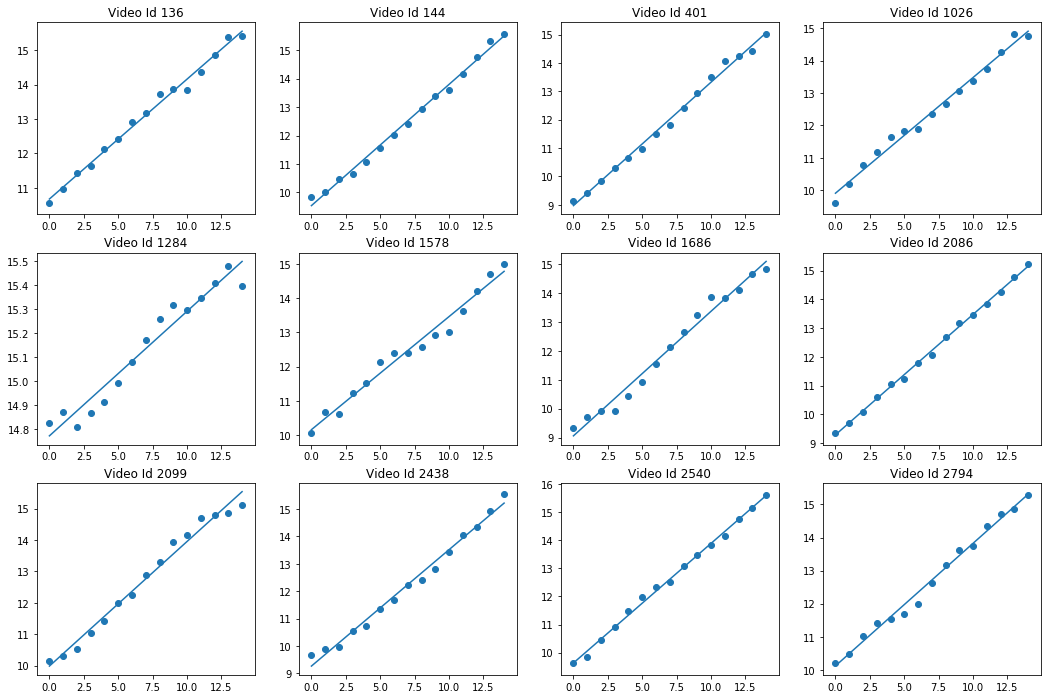

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

for i in range(len(hot_id_list)):
    for j in range(len(hot_id_list[i])):
        
        df_temp = df_count[df_count.video_id == hot_id_list[i][j]].sort_values('date')

        X = []
        Y = []
        for k in range(df_temp.shape[0]):
            X.append(k)
            Y.append(np.log(df_temp.iloc[k,1]))


        linear.fit(np.array(X).reshape(-1,1),Y)

        ax[i,j].plot(linear.coef_ * np.array(X) + linear.intercept_)
        ax[i,j].scatter(X, Y)
        ax[i,j].set_title('Video Id %i' %hot_id_list[i][j])

        print("Id: ",hot_id_list[i][j], 'Log Slope:', linear.coef_[0])

### Define Stable and Popular

In [18]:
df_stable = df_popular[(df_popular.means > tot_mean) & (abs(df_popular.coeff) <= 0.05)]
df_stable.head(10)

,video_id,counts,means,coeff
1,2,26057119,1.737141e+06,-0.006330
2,3,34391719,2.292781e+06,0.012894
3,4,41105881,2.740392e+06,0.011313
7,8,30740405,2.049360e+06,0.008080
13,14,23901213,1.593414e+06,-0.029394
18,20,12351711,8.234474e+05,-0.003386
27,31,10681447,7.120965e+05,-0.012921
28,32,38203004,2.546867e+06,0.001827
32,36,46340538,3.089369e+06,0.016827
33,37,22093492,1.472899e+06,0.006635


### Other Videos

In [19]:
df_other = df_popular[(df_popular.means < tot_mean) | 
           ((df_popular.means >= tot_mean) & (df_popular.coeff <= -0.05))]
df_other.head(10)

,video_id,counts,means,coeff
0,1,1059534,7.063560e+04,-0.138611
4,5,6719960,4.479973e+05,-0.114482
5,6,1097226,7.314840e+04,-0.169402
6,7,3792578,2.528385e+05,-0.148929
8,9,4901,3.267333e+02,0.007871
9,10,133547,8.903133e+03,0.283766
10,11,5347514,3.565009e+05,-0.109406
11,12,19324128,1.288275e+06,-0.120840
12,13,1368423,9.122820e+04,0.299536
14,15,92766,6.184400e+03,0.280105


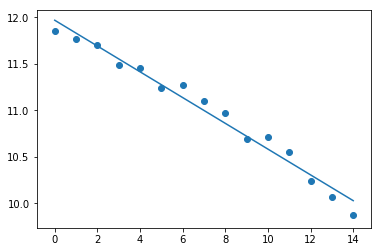

-0.1386109629017847


In [20]:
# For example, ID = 1, decaying video

df_temp = df_count[df_count.video_id == 1].sort_values('date')

X = []
Y = []
for i in range(df_temp.shape[0]):
    X.append(i)
    Y.append(np.log(df_temp.iloc[i,1]))
    
    
linear.fit(np.array(X).reshape(-1,1),Y)

plt.plot(linear.coef_ * np.array(X) + linear.intercept_)
plt.scatter(X, Y)
plt.show()

print(linear.coef_[0])

## Question II

What are the main characteristics of the “hot videos”?

In [21]:
df_hot = pd.merge(df_hot, df_feature, how = 'left', on ='video_id')
df_hot

,video_id,counts,means,coeff,video_length,video_language,video_upload_date,video_quality
0,136,19068523,1.271235e+06,0.348317,577,Cn,2014-12-16,720p
1,144,16782672,1.118845e+06,0.426064,760,En,2014-12-22,1080p
2,401,9804659,6.536439e+05,0.434935,700,En,2014-12-16,480p
3,1026,9989238,6.659492e+05,0.356837,691,Cn,2014-12-24,720p
4,1284,57635939,3.842396e+06,0.051869,316,Cn,2014-12-17,1080p
5,1578,10107352,6.738235e+05,0.330657,1011,En,2014-12-18,360p
6,1686,9920267,6.613511e+05,0.431599,88,Other,2014-12-19,720p
7,2086,11435273,7.623515e+05,0.419406,282,Cn,2014-12-16,360p
8,2099,15728759,1.048584e+06,0.397296,979,Cn,2014-12-18,480p
9,2438,13466818,8.977879e+05,0.425041,537,En,2014-12-21,720p


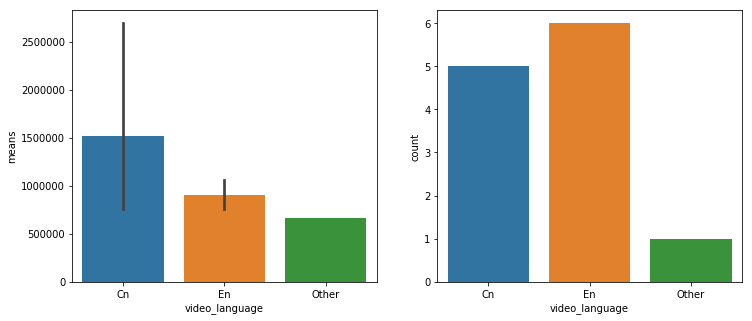

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x = df_hot.video_language, y = df_hot.means, ax=ax[0])
sns.countplot(df_hot.video_language, ax=ax[1])
plt.show()

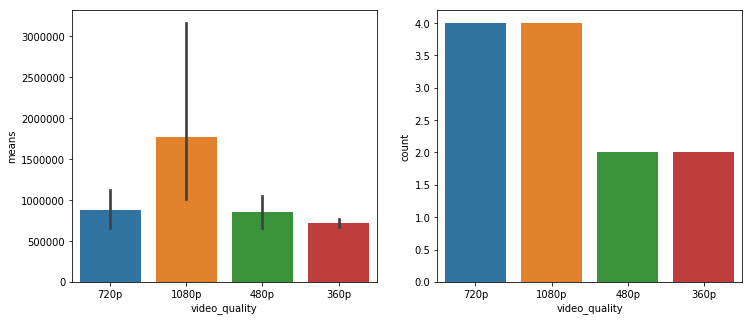

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x = df_hot.video_quality, y = df_hot.means, ax=ax[0])
sns.countplot(df_hot.video_quality, ax=ax[1])
plt.show()

In [24]:
df_stable = pd.merge(df_stable, df_feature, how = 'left', on ='video_id')
df_stable

,video_id,counts,means,coeff,video_length,video_language,video_upload_date,video_quality
0,2,26057119,1.737141e+06,-0.006330,751,Cn,2014-12-14,480p
1,3,34391719,2.292781e+06,0.012894,807,En,2014-12-15,1080p
2,4,41105881,2.740392e+06,0.011313,545,En,2014-12-11,360p
3,8,30740405,2.049360e+06,0.008080,55,De,2014-12-12,480p
4,14,23901213,1.593414e+06,-0.029394,651,Cn,2014-12-18,720p
5,20,12351711,8.234474e+05,-0.003386,822,En,2014-12-12,1080p
6,31,10681447,7.120965e+05,-0.012921,101,Other,2014-12-12,1080p
7,32,38203004,2.546867e+06,0.001827,543,Cn,2014-12-13,720p
8,36,46340538,3.089369e+06,0.016827,834,Other,2014-12-09,720p
9,37,22093492,1.472899e+06,0.006635,151,Cn,2014-12-09,1080p


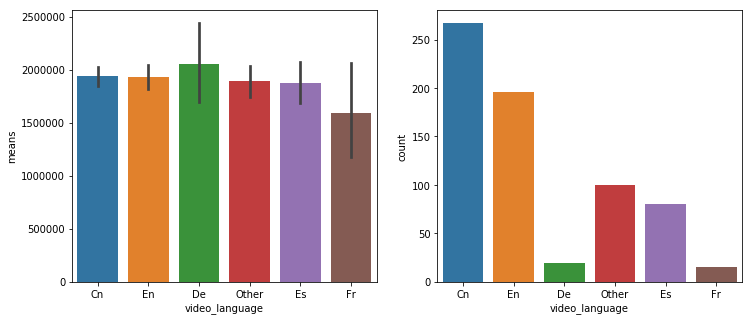

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x = df_stable.video_language, y = df_stable.means, ax=ax[0])
sns.countplot(df_stable.video_language, ax=ax[1])
plt.show()

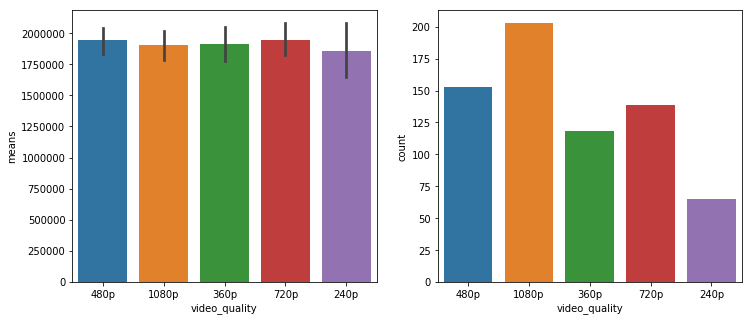

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x = df_stable.video_quality, y = df_stable.means, ax=ax[0])
sns.countplot(df_stable.video_quality, ax=ax[1])
plt.show()

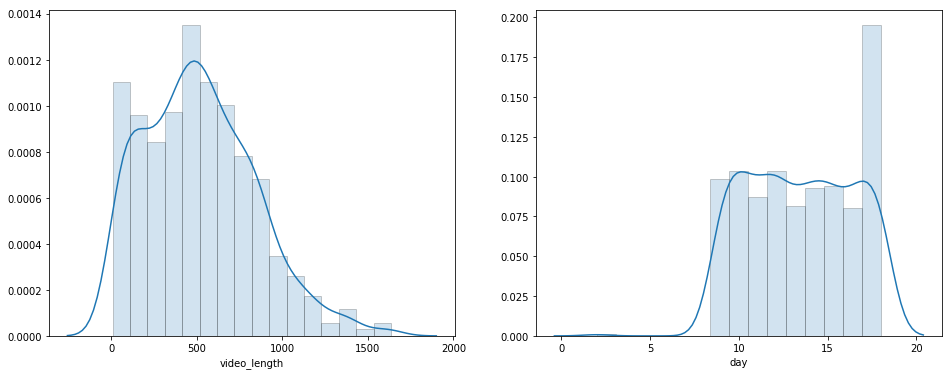

In [27]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

df_stable.video_upload_date = pd.to_datetime(df_stable.video_upload_date)
df_stable['day'] = df_stable.video_upload_date.dt.day

sns.distplot(df_stable.video_length, hist_kws= hist_kws, ax=ax[0])
sns.distplot(df_stable.day, hist_kws= hist_kws, ax=ax[1])
plt.show()

In [28]:
df_stable.video_upload_date.dt.day

0      14
1      15
2      11
3      12
4      18
5      12
6      12
7      13
8       9
9       9
10     10
11      9
12     14
13     15
14     15
15     17
16     17
17     12
18     12
19     16
20     14
21     14
22     12
23     11
24     12
25     16
26     10
27     11
28     16
29     18
       ..
648    14
649    11
650    18
651    11
652    16
653    18
654    14
655    13
656    10
657    18
658    11
659    11
660    16
661    10
662    13
663     9
664    18
665    14
666    11
667    14
668    14
669     9
670    10
671    14
672    18
673    12
674     9
675    18
676    17
677    17
Name: video_upload_date, Length: 678, dtype: int64

In [29]:
df_other = pd.merge(df_other, df_feature, how = 'left', on ='video_id')
df_other.head(10)

,video_id,counts,means,coeff,video_length,video_language,video_upload_date,video_quality
0,1,1059534,7.063560e+04,-0.138611,1496,Es,2014-12-04,720p
1,5,6719960,4.479973e+05,-0.114482,953,En,2014-12-10,1080p
2,6,1097226,7.314840e+04,-0.169402,652,En,2014-12-08,720p
3,7,3792578,2.528385e+05,-0.148929,1198,Other,2014-12-10,720p
4,9,4901,3.267333e+02,0.007871,1248,Es,2014-12-15,480p
5,10,133547,8.903133e+03,0.283766,119,Es,2014-12-23,480p
6,11,5347514,3.565009e+05,-0.109406,1282,Es,2014-12-08,720p
7,12,19324128,1.288275e+06,-0.120840,757,En,2014-12-07,360p
8,13,1368423,9.122820e+04,0.299536,710,En,2014-12-19,720p
9,15,92766,6.184400e+03,0.280105,248,Fr,2014-12-24,720p


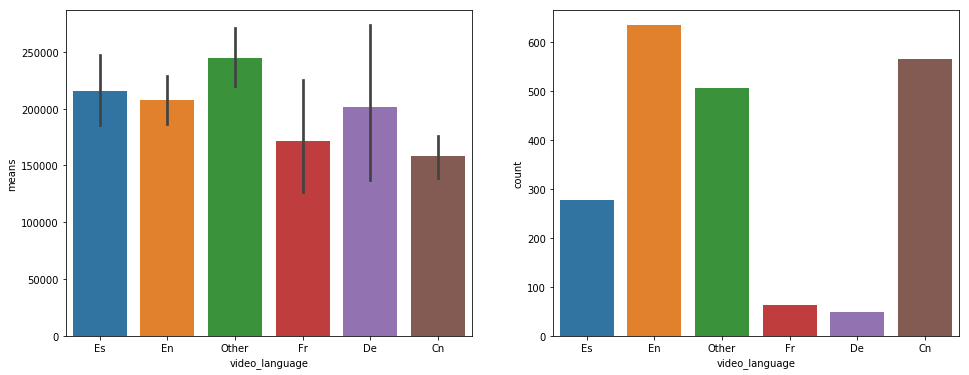

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.barplot(x = df_other.video_language, y = df_other.means, ax=ax[0])
sns.countplot(df_other.video_language, ax=ax[1])
plt.show()

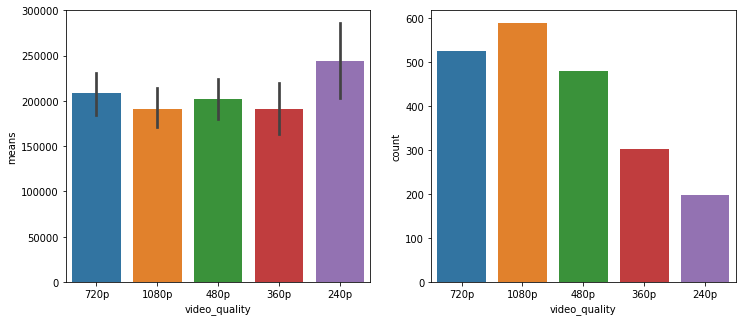

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.barplot(x = df_other.video_quality, y = df_other.means, ax=ax[0])
sns.countplot(df_other.video_quality, ax=ax[1])
plt.show()

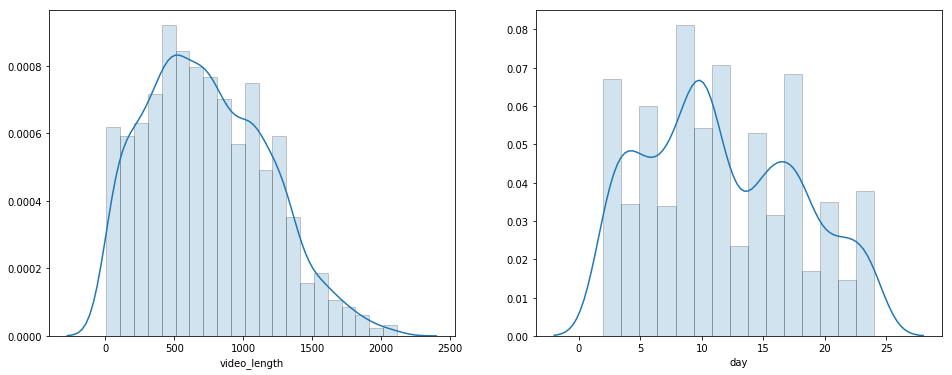

In [32]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

df_other.video_upload_date = pd.to_datetime(df_other.video_upload_date)
df_other['day'] = df_other.video_upload_date.dt.day

sns.distplot(df_other.video_length, hist_kws= hist_kws, ax=ax[0])
sns.distplot(df_other.day, hist_kws= hist_kws, ax=ax[1])
plt.show()

In [33]:
df_hot['label'] = 'hot'
df_stable['label'] = 'stable & pop'
df_other['label'] = 'others'

df2 = pd.concat([df_hot,df_stable, df_other], axis=0)
df2.label.value_counts()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


others          2095
stable & pop     678
hot               12
Name: label, dtype: int64

In [34]:
df2.video_upload_date = pd.to_datetime(df2.video_upload_date)
df2['day'] = df2.video_upload_date.dt.day
df2['weekday'] = df2.video_upload_date.dt.weekday

In [35]:
df2.head()

,coeff,counts,day,label,means,video_id,video_language,video_length,video_quality,video_upload_date,weekday
0,0.348317,19068523,16,hot,1.271235e+06,136,Cn,577,720p,2014-12-16,1
1,0.426064,16782672,22,hot,1.118845e+06,144,En,760,1080p,2014-12-22,0
2,0.434935,9804659,16,hot,6.536439e+05,401,En,700,480p,2014-12-16,1
3,0.356837,9989238,24,hot,6.659492e+05,1026,Cn,691,720p,2014-12-24,2
4,0.051869,57635939,17,hot,3.842396e+06,1284,Cn,316,1080p,2014-12-17,2


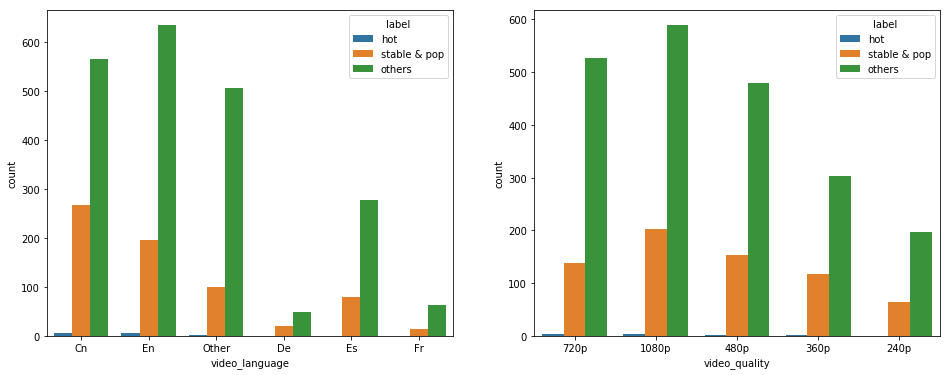

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.countplot(df2.video_language, hue = df2.label, ax=ax[0])
sns.countplot(df2.video_quality, hue = df2.label, ax = ax[1])
plt.show()

Chinese videos have more hot and stable & pop ones, folloed by English.

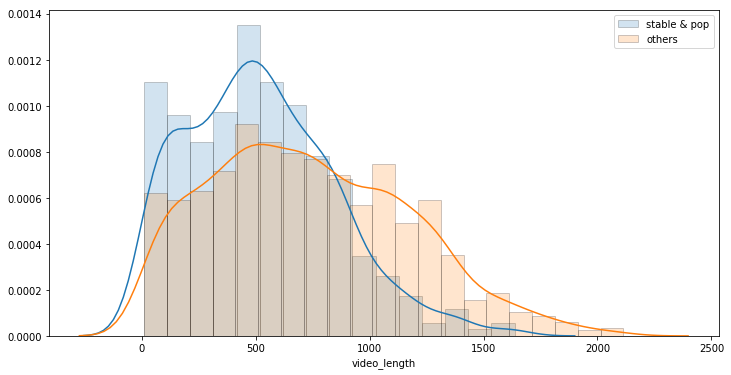

In [37]:
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
fig, ax = plt.subplots(figsize=(12, 6))

#sns.distplot(df2[df2.label=='hot'].video_length, hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='stable & pop'].video_length, label = 'stable & pop', hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='others'].video_length, label ='others', hist_kws = hist_kws, ax=ax)
ax.legend()
plt.show()

Short videos with length ~ 500 -1000 are more popular than long videos.

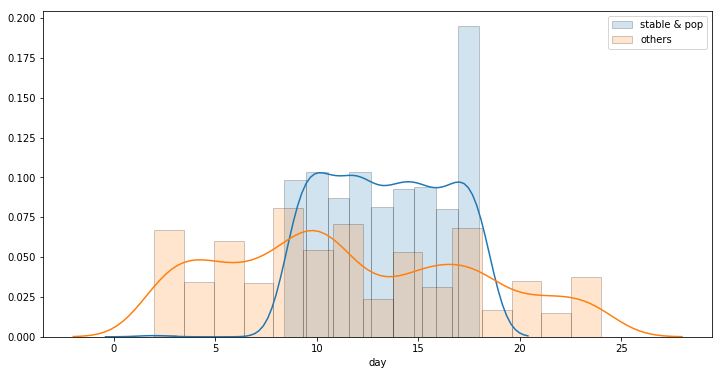

In [38]:
fig, ax = plt.subplots(figsize=(12, 6))

#sns.distplot(df2[df2.label=='hot'].video_length, hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='stable & pop'].day, label = 'stable & pop', hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='others'].day, label ='others', hist_kws = hist_kws, ax=ax)
ax.legend()
plt.show()

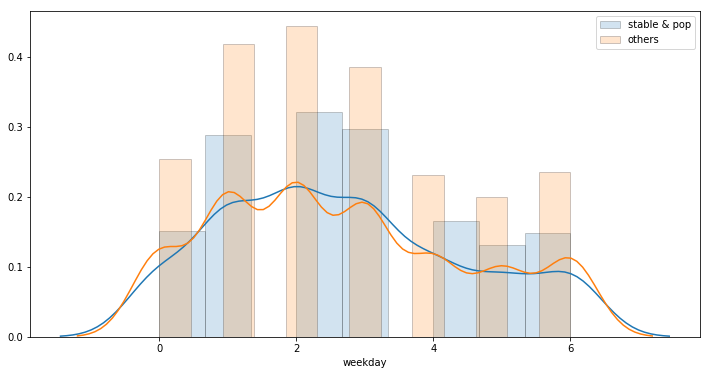

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))

#sns.distplot(df2[df2.label=='hot'].video_length, hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='stable & pop'].weekday, label = 'stable & pop', hist_kws = hist_kws, ax=ax)
sns.distplot(df2[df2.label=='others'].weekday, label ='others', hist_kws = hist_kws, ax=ax)
ax.legend()
plt.show()